A scrap notebook for playing around with functionality.

In [25]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import MaxNLocator

%matplotlib inline

So number of subplots must be known in advance, but what we can add to them is arbitrary.

Create function that initiates a figure.

Create function that adds subplots.

In [2]:
from pyStrat import read_data
from pyStrat import read_formatting
data = read_data('data_template.csv')
formatting = read_formatting('formatting_template.csv')

In [ ]:
# replace widths of 1.0 with 0.9 so they don't span the entire plot width
formatting.width.replace(1.00, 0.9, inplace=True)

In [3]:
def initiate_figure(data, formatting, strat_ratio, figwidth, width_ratios):
    patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
    ncols = len(width_ratios)
    fig, axs = plt.subplots(nrows=1, ncols=ncols, sharey=True, gridspec_kw={'width_ratios':width_ratios})

    # get the colour and width headers being used
    colour_header = formatting.columns[3]
    width_header = formatting.columns[6]

    # initiate counting of the stratigraphic height
    strat_height = 0.0

    # loop over elements of the data
    for i in range(len(data.index)):

        # only plot non-nan cells
        if pd.notnull(data['THICKNESS'][i]):

            # find the thickness to be used
            this_thickness = data['THICKNESS'][i]

            # find the colour and width to be used
            for j in range(len(formatting.index)):
                if data[colour_header][i] == formatting[colour_header][j]:
                    this_colour = [formatting['r'][j], formatting['g'][j], formatting['b'][j]]
                if data[width_header][i] == formatting[width_header][j]:
                    this_width = formatting['width'][j]

            # create the rectangle
            rect = axs[0].add_patch(patches.Rectangle((0.0,strat_height), this_width, this_thickness, facecolor=this_colour))
#             rect.set_hatch(patterns[np.random.randint(len(patterns))])
            # count the stratigraphic height
            strat_height = strat_height + this_thickness

    # force the limits on the lithostratigraphy plot
    axs[0].set_xlim([0,1])
    axs[0].set_ylim([0,strat_height])
    
    # force the size of the plot
    fig.set_figheight(strat_height * strat_ratio)
    fig.set_figwidth(figwidth)

    # prettify
    axs[0].set_ylabel('stratigraphic height [m]')
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])
    
    return fig, axs

In [27]:
def add_data_axis(fig, axs, ax_num, x, y, style, **kwargs):
    ax = axs[ax_num]
    if style == 'plot':
        ax.plot(x, y, **kwargs)
    elif style == 'scatter':
        ax.scatter(x, y, **kwargs)
    else:
        print("Only 'plot' and 'scatter' are supported for 'style.")
    return ax

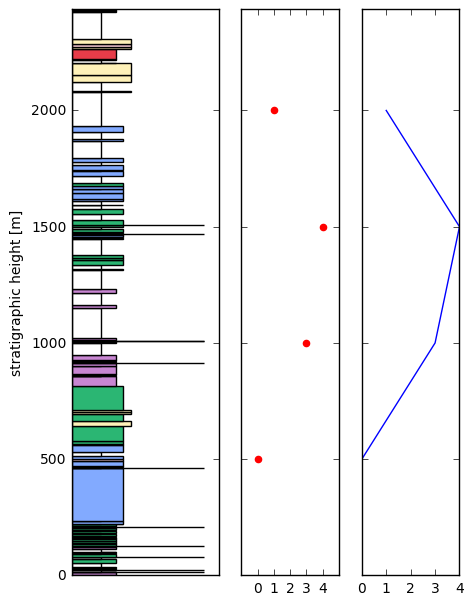

In [34]:
fig, axs = initiate_figure(data, formatting, 0.003, 5, [3,2,2])
ax2 = add_data_axis(fig, axs, 1, [0,3,4,1], [500,1000,1500,2000], 'scatter', color='red')
# add some code to prevent overlapping tick labels
ax2.xaxis.set_major_locator(MaxNLocator(6, prune='both'))
ax3 = add_data_axis(fig, axs, 2, [0,3,4,1], [500,1000,1500,2000], 'plot', linewidth=1)
# add some code to prevent overlapping tick labels
ax3.xaxis.set_major_locator(MaxNLocator(4))